# Kickstarter Projects
## 1.Data preparation and cleaning
## Import Python Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# need to install
#conda install -c konstantinstadler country_converter
import country_converter as coco # a country converter

# conda install -c anaconda nltk
import nltk # for NLP
#ltk.download('stopwords')

## Data preperation

In [151]:
df = pd.read_csv("ks-projects-201801.csv")
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [152]:
df.columns #let's see which columns ther are

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

## Drop Unnecessary Columns

TODO: explain why we dropped this...

In [153]:
df = df.drop('backers', axis = 1) #TODO: explain
df = df.drop('usd pledged', axis = 1) #there is usd_pledged_real
df = df.drop('currency', axis = 1)    # TODO: explain
df = df.drop('goal', axis = 1)    # TODO: explain
df = df.drop('pledged', axis = 1)    # TODO: explain
df = df.drop('ID', axis = 1)    # TODO: explain

In [154]:
df.head(3)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,US,220.0,45000.00


## Drop Unnecessary rows
TODO: explain...

In [155]:
# Drop live projects
df = df.query('state != "live"')

# Drop project with ' N,0" ' country
df = df.query("country != 'N,0\"' ")

TODO: change it...
When examine the dataset, we paid attention that there are few rows that their launchdate was wrong.

In [156]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()

df[['name','deadline','launched']].nsmallest(10, 'launched')

,name,deadline,launched
2842,Salt of the Earth: A Dead Sea Movie (Canceled),2010-09-15,1970-01-01
48147,1st Super-Size Painting - Social Network Owned...,2010-08-14,1970-01-01
75397,"""ICHOR"" (Canceled)",2010-05-21,1970-01-01
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",2010-06-01,1970-01-01
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",2010-05-04,1970-01-01
273779,Identity Communications Infographic (Canceled),2010-04-10,1970-01-01
319002,Student Auditions Music 2015,2015-10-31,1970-01-01
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,2009-05-31,2009-04-21
322000,CRYSTAL ANTLERS UNTITLED MOVIE,2009-07-20,2009-04-23
138572,drawing for dollars,2009-05-03,2009-04-24


Let's remove them.

In [157]:
df = df.query('launched > "2008-01-01"')

## Impute missing values

We want to see how many missing values we have - complete them, or ignore this rows.
We found we have only 4 rows with missing values so we remove them.

In [158]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
print(missing_values_count[0:23])
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(total_missing)

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64
4


In [159]:
# remove all columns with at least one missing value
df = df.dropna()

## Insert New Columns

First, we want to add a 'Duration' column

In [160]:
df['duration'] = pd.to_datetime(df['deadline'], )-pd.to_datetime(df['launched']).dt.normalize()

## Convert Columns #TODO: happened before...

In [161]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()
df.head(5)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,GB,0.0,1533.95,59 days
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,US,2421.0,30000.00,60 days
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,US,220.0,45000.00,45 days
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,US,1.0,5000.00,30 days
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04,canceled,US,1283.0,19500.00,56 days


## Integrate with outsource DataSets
TODO: explain about the dataset

countries translation

In [162]:
countries = pd.unique(df.country)
countries_list = list(countries)
print(countries_list)
countries_names = coco.convert(names=countries_list, to='name_short')
l = sorted(countries_names, key=lambda L: (L.lower(), L))
print(l)

['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP']
['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Hong Kong', 'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


TODO: explain add the dataset...

Warning: heavy function

In [163]:
countries_GDP = pd.read_csv("ks_countries_gdp.csv")
countries_GDP.columns
countries_GDP_dict = pd.Series(countries_GDP['GDP ($ per capita)'].values,countries_GDP.Country).to_dict()
#print(countries_GDP_dict)

def label_GDP(row):
    l = []
    l.append(row['country'])
    country = coco.convert(names=l,to='name_short')
    return countries_GDP_dict[country+" "]


#df['country_GDP'] = df.apply(lambda row: label_GDP(row), axis=1)
df.head(5)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,GB,0.0,1533.95,59 days
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,US,2421.0,30000.00,60 days
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,US,220.0,45000.00,45 days
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,US,1.0,5000.00,30 days
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04,canceled,US,1283.0,19500.00,56 days


## Specifying Data Types

In [164]:
#binary_variables = ['class']
categorical_variables = ['category', 'main_category', 'state', 'country']
numeric_variables = ['usd_pledged_real','usd_goal_real']
date_time_variables = ['deadline','launched','duration']

## Type Conversion

In [165]:
#TODO: Specifying Data Types, Type Conversion, Categorical and Binary Variables to String

In [166]:
df[categorical_variables].dtypes

category         object
main_category    object
state            object
country          object
dtype: object

In [167]:
df[numeric_variables].dtypes

usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [168]:
df[date_time_variables].dtypes

deadline     datetime64[ns]
launched     datetime64[ns]
duration    timedelta64[ns]
dtype: object

## Remove Whitespaces

In [169]:
# Map(func,sequence) -  operates a function on a sequence
# Lambda var1,var2.. : Expression -  Creates an inline function
for variable in categorical_variables:
    df[variable] = df[variable].map(lambda x : x.strip())

## Binarize State label

In [170]:
df['state'] = df['state'].map(lambda x : '1' if x == 'successful' else '0')

## Data Statistics

In [171]:
df.describe()

##TODO: need to remove the huge duration...

,usd_pledged_real,usd_goal_real,duration
count,3.720550e+05,3.720550e+05,372055
mean,9.145509e+03,4.573831e+04,34 days 04:12:09.840480
std,9.162231e+04,1.151699e+06,12 days 19:02:33.006067
min,0.000000e+00,1.000000e-02,1 days 00:00:00
25%,3.125000e+01,2.000000e+03,30 days 00:00:00
50%,6.279700e+02,5.500000e+03,30 days 00:00:00
75%,4.066000e+03,1.600000e+04,37 days 00:00:00
max,2.033899e+07,1.663614e+08,92 days 00:00:00


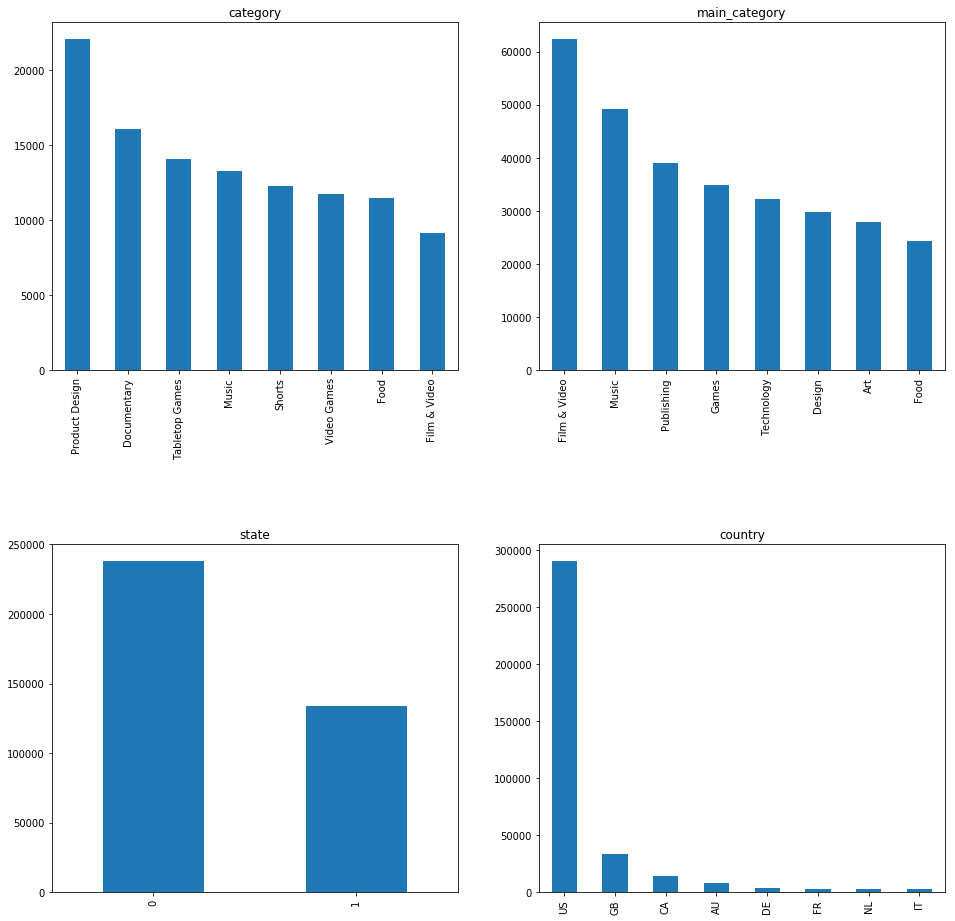

In [172]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
i=0
n=len(categorical_variables)
for variable in categorical_variables:
    r=int(i/2)
    c=i%2
    i+=1
    u=min(len(df[variable].unique()),8)
    df[variable].value_counts()[:u].plot(kind='bar',ax=axes[r,c],title=variable)

## Class Distribution

In [173]:
print (df['state'].value_counts())
print (df['state'].value_counts(normalize='True'))

0    238204
1    133851
Name: state, dtype: int64
0    0.640239
1    0.359761
Name: state, dtype: float64


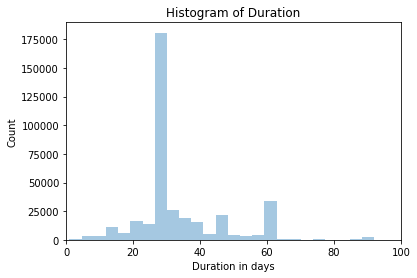

In [174]:
%matplotlib inline
sns.distplot(df['duration'].dt.days, bins = 25, kde = False).set(xlim=(0, 100))
plt.title('Histogram of Duration')
plt.xlabel('Duration in days')
plt.ylabel('Count')
plt.show()

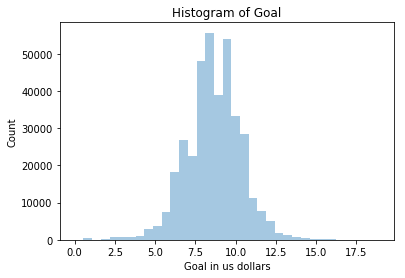

In [175]:
%matplotlib inline
sns.distplot(np.log1p(df['usd_goal_real']), bins = 35, kde = False)
plt.title('Histogram of Goal')
plt.xlabel('Goal in us dollars')
plt.ylabel('Count')
plt.show()

## Analyzing 'name' column - DRAFT!!!

We noticed more then 20k rows contains '(Canceled)' in their name.
Probably was changed by the owners after cancelling the project and opening a new one.
TODO: explain...

In [176]:
freq = pd.Series(' '.join(df['name']).split()).value_counts()[:10]
freq

The           61774
-             53415
the           33698
of            32988
A             28526
and           23428
(Canceled)    23093
a             20532
for           19618
&             17578
dtype: int64

Let's remove this "clue".

In [177]:
df['name']= df['name'].str.replace("\(Canceled\)","")
freq = pd.Series(' '.join(df['name']).split()).value_counts()[:10]
freq

The    61774
-      53415
the    33698
of     32988
A      28526
and    23428
a      20532
for    19618
&      17578
to     16640
dtype: int64

In [178]:
sub_df = df
sub_df = sub_df.drop('category', axis = 1)
sub_df = sub_df.drop('main_category', axis = 1)
sub_df = sub_df.drop('deadline', axis = 1)
sub_df = sub_df.drop('launched', axis = 1)
sub_df = sub_df.drop('state', axis = 1)
sub_df = sub_df.drop('usd_pledged_real', axis = 1)
sub_df = sub_df.drop('usd_goal_real', axis = 1)
sub_df = sub_df.drop('duration', axis = 1)
sub_df = sub_df.drop('country', axis = 1)

In [179]:
sub_df.sample(10)
sub_df.columns

Index(['name'], dtype='object')

In [180]:
sub_df['char_count'] = sub_df['name'].str.len() ## this also includes spaces
#sub_df[['name','char_count']].head()

In [182]:
def avg_word(sentence):
  words = sentence.split()
  if (len(words)==0):
        return 0
  return (sum(len(word) for word in words)/len(words))

sub_df['avg_word'] = sub_df['name'].apply(lambda x: avg_word(x))
sub_df[['name','char_count','avg_word']].head()

,name,char_count,avg_word
0,The Songs of Adelaide & Abullah,31,4.333333
1,Greeting From Earth: ZGAC Arts Capsule For ET,45,4.750000
2,Where is Hank?,14,4.000000
3,ToshiCapital Rekordz Needs Help to Complete Album,49,6.142857
4,Community Film Project: The Art of Neighborhoo...,58,6.375000


In [183]:
#from nltk.corpus import stopwords
stop = stopwords.words('english')

sub_df['stopwords'] = sub_df['name'].apply(lambda x: len([x for x in x.split() if x in stop]))
sub_df[['name','stopwords']].head()

,name,stopwords
0,The Songs of Adelaide & Abullah,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,Where is Hank?,1
3,ToshiCapital Rekordz Needs Help to Complete Album,1
4,Community Film Project: The Art of Neighborhoo...,1


In [184]:
sub_df.head()

,name,char_count,avg_word,stopwords
0,The Songs of Adelaide & Abullah,31,4.333333,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,45,4.750000,0
2,Where is Hank?,14,4.000000,1
3,ToshiCapital Rekordz Needs Help to Complete Album,49,6.142857,1
4,Community Film Project: The Art of Neighborhoo...,58,6.375000,1


In [185]:
sub_df['name'] = sub_df['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [186]:
sub_df['name'] = sub_df['name'].str.replace('[^\w\s]','')

In [187]:
stop = stopwords.words('english')
sub_df['name'] = sub_df['name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [188]:
current_df = df
current_df = current_df.query('state != "0"')
#df = df.query('state != "live"')
freq = pd.Series(' '.join(current_df['name']).split()).value_counts()[:10]